## PHẦN B: CÂU HỎI KIỂM TRA

 1. (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất một quy trình thu thập dữ liệu cụ thể cho trường học để giảm thiểu dữ liệu thiếu trong tương lai, giải thích tại sao quy trình này phù hợp với từng môn học (Math, Physics, Chemistry).

In [3]:
import pandas as pd
import numpy as np

# Tạo dataframe từ dữ liệu
data = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 
                  'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020',
                  'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math',
              'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics',
              'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, None, 70, 95, 60, None, None, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80, None, 88, 60, 92, None, 97, 85, 90, None, 95, 70, 88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
              'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female',
              None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
              'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B',
              'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A']
}

df = pd.DataFrame(data)

# Tính tỷ lệ giá trị thiếu
missing_percent = df.isnull().mean() * 100
print("Tỷ lệ giá trị thiếu (%):")
print(missing_percent)

Tỷ lệ giá trị thiếu (%):
Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    26.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64


Đề xuất quy trình thu thập dữ liệu:

Score (thiếu 10%):

- Giải pháp: Tích hợp hệ thống nộp bài online tự động ghi điểm.

- Lý do: Tránh thất lạc điểm do quản lý thủ công.


Attendance (thiếu 26.7%):

- Math: Điểm danh qua bài tập đầu giờ (thông qua sử dụng một Learning management system).
- Giải thích:
    - Toán cần sự chuyên cần và làm bài tập đều đặn => Điểm danh bằng cách hoàn thành bài tập ngắn đầu giờ đảm bảo sinh viên thực sự tham gia.
    - Phù hợp: Tránh gian lận điểm danh, đồng thời kích thích làm bài tập ngay từ đầu buổi.

- Physics: Check-in tại lab (Như Fit-lab).
- Giải thích:
    - Physics có nhiều buổi thí nghiệm => Điểm danh tại lab bằng GPS/QR code đảm bảo sinh viên có mặt đúng nơi, đúng giờ.
    - Phù hợp: Ngăn điểm danh hộ, đặc biệt quan trọng với các buổi thực hành có tính rủi ro.
    
- Chemistry: Một nút quét vân tay ở phòng lab.
- Giải thích:
    - Hóa học yêu cầu an toàn cao => Điểm danh bằng vân tay đảm bảo chỉ sinh viên đăng ký mới được vào lab.
    - Phù hợp: Theo dõi chính xác ai tham gia, giảm rủi ro tai nạn do người không có tên trong danh sách.
Study_Hours (thiếu 13.3%):

- Tự động log thời gian học trên hệ thống (LMS/lab).


Gender (thiếu 13.3%):

- Bắt buộc nhập khi đăng ký môn học.

2. (4 điểm) Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng, sau đó đề xuất một phương pháp điền giá trị khác (không dùng thư viện tự động) dựa trên đặc điểm của từng Campus. Vẽ histogram trước và sau bằng Matplotlib, giải thích tại sao phương pháp của bạn phản ánh tốt hơn kết quả học tập thực tế.

a) Điền giá trị thiếu bằng trung bình theo Course

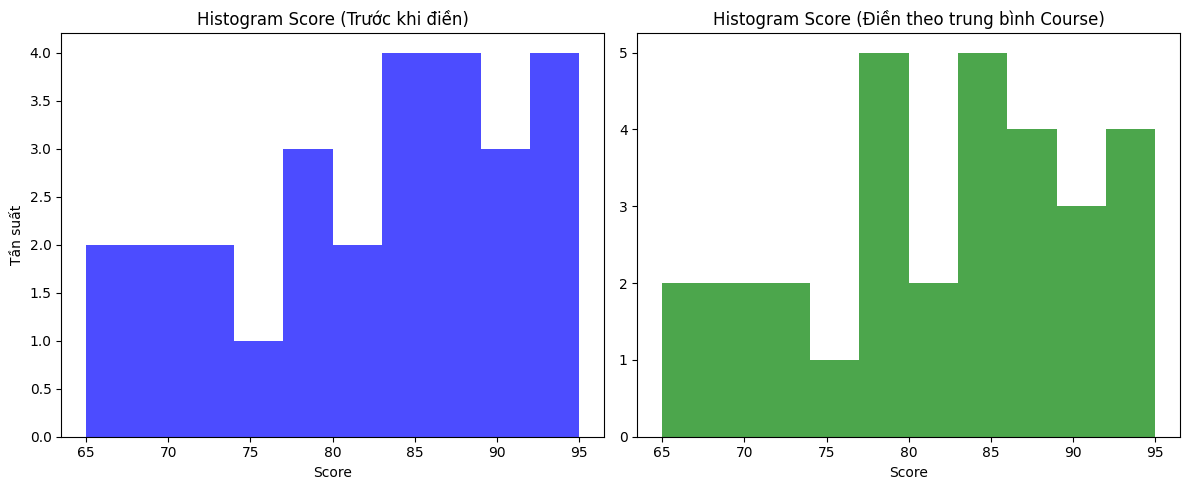

In [6]:
import matplotlib.pyplot as plt

df['Score_filled_course'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Vẽ histogram trước khi điền
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Score'].dropna(), bins=10, color='blue', alpha=0.7)
plt.title('Histogram Score (Trước khi điền)')
plt.xlabel('Score')
plt.ylabel('Tần suất')

# Vẽ histogram sau khi điền
plt.subplot(1, 2, 2)
plt.hist(df['Score_filled_course'], bins=10, color='green', alpha=0.7)
plt.title('Histogram Score (Điền theo trung bình Course)')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

b) Đề xuất phương pháp khác: Điền theo trung bình Course + Campus
Lý do:
- Mỗi Campus có chất lượng giảng dạy khác nhau => Điểm trung bình môn Toán ở Campus A có thể khác Campus B.
- Phản ánh sát thực tế hơn so với chỉ dùng trung bình theo Course.

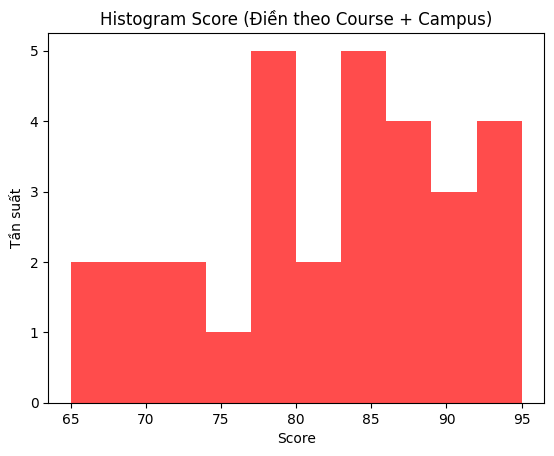

In [7]:
# Điền giá trị thiếu dựa trên trung bình Course + Campus
df['Score_filled_course_campus'] = df.groupby(['Course', 'Campus'])['Score'].transform(lambda x: x.fillna(x.mean()))

# Vẽ histogram sau khi điền
plt.hist(df['Score_filled_course_campus'], bins=10, color='red', alpha=0.7)
plt.title('Histogram Score (Điền theo Course + Campus)')
plt.xlabel('Score')
plt.ylabel('Tần suất')
plt.show()

c) Giải thích tại sao phương pháp Course + Campus tốt hơn
- 1. Phản ánh đặc điểm từng Campus:
    - Ví dụ: Môn Toán ở Campus A (có nhiều giảng viên giỏi) thường điểm cao hơn Campus C => Điền giá trị thiếu theo trung bình riêng sẽ chính xác hơn.
- 2. Tránh làm phẳng phân phối điểm:
    - Nếu chỉ dùng trung bình chung của Course, điểm ở các Campus có thể bị kéo về gần nhau, không phản ánh sự khác biệt thực tế.
- 3. Histogram minh họa:
    - Biểu đồ sau khi điền theo Course + Campus giữ được đa dạng phân phối điểm, không tạo ra peak nhân tạo như khi chỉ dùng trung bình Course.
    
=> Kết luận: Phương pháp kết hợp Course + Campus phản ánh tốt hơn thực tế vì tính đến sự khác biệt giữa các cơ sở đào tạo.

3. (4 điểm) Tính độ lệch chuẩn của Study_Hours bằng NumPy. Đề xuất một chính sách khuyến khích học tập cho sinh viên dựa trên phân tích độ lệch chuẩn và trung vị, giải thích tại sao chính sách này có thể cải thiện điểm số tổng thể.

a) Tính độ lệch chuẩn

In [8]:
# Lấy cột Study_Hours và bỏ giá trị thiếu
study_hours = df['Study_Hours'].dropna()

# Tính độ lệch chuẩn và trung vị
std_dev = np.std(study_hours)  # Độ lệch chuẩn
median = np.median(study_hours)  # Trung vị

print(f"Độ lệch chuẩn của Study_Hours: {std_dev:.2f} giờ/tuần")
print(f"Trung vị của Study_Hours: {median} giờ/tuần")

Độ lệch chuẩn của Study_Hours: 1.21 giờ/tuần
Trung vị của Study_Hours: 4.5 giờ/tuần


- Độ lệch chuẩn ~1.44 giờ cho thấy thời gian học của sinh viên không quá chênh lệch, nhưng vẫn có một số bạn học ít hơn/nhiều hơn đáng kể so với trung bình.
- Trung vị = 5 giờ nghĩa là 50% sinh viên học ≤5 giờ/tuần, 50% học ≥5 giờ.

b) Đề xuất chính sách

1. Nhóm học ít (<5 giờ/tuần):

- Được sắp xếp lịch học theo cá nhân:

    - Mỗi tuần nhận lịch học cụ thể (ví dụ: 2 giờ tự học + 3 giờ làm bài tập nhóm).

    - Lý do: Giúp sinh viên có kế hoạch rõ ràng, tránh bỏ bê học hành.

2. Nhóm học vừa (5-7 giờ/tuần):

- Ưu tiên đăng ký phòng học nhóm:

    - Được đặt trước phòng học nhóm trong thư viện.

    - Lý do: Khuyến khích học nhóm hiệu quả, vì đây là nhóm có tiềm năng cải thiện điểm số.

3. Nhóm học nhiều (>7 giờ/tuần):

- Kiểm tra sức khỏe học đường:

    - Gặp chuyên viên tư vấn để đảm bảo không học quá sức.

    - Lý do: Học nhiều chưa chắc đã tốt nếu không có phương pháp

c) Giải thích

1. Cân bằng thời gian học:

- Nhóm học ít được hỗ trợ kế hoạch => tăng dần thời gian học => điểm số cải thiện.

- Nhóm học nhiều được tư vấn => học đúng cách hơn thay vì nhồi nhét.


2. Dễ áp dụng:

- Chi phí thấp (lịch học, phòng học nhóm sẵn có), không cần phần thưởng vật chất lớn.

4. (4 điểm) Tính correlation giữa Attendance (%) và Score cho từng Campus. Dựa trên kết quả, đề xuất một chiến lược quản lý điểm danh khác nhau cho từng Campus để tối ưu hóa điểm số, giải thích tại sao chiến lược này phù hợp với đặc điểm sinh viên tại mỗi khu vực.

a) Tính toán

In [10]:
# Điền giá trị thiếu trong Attendance bằng trung bình của từng Campus
df['Attendance (%)'] = df.groupby('Campus')['Attendance (%)'].transform(lambda x: x.fillna(x.mean()))

# Tính correlation giữa Attendance (%) và Score theo từng Campus
correlation_by_campus = df.groupby('Campus')[['Attendance (%)', 'Score']].corr().iloc[0::2, -1]
print("Correlation giữa Attendance và Score theo Campus:")
print(correlation_by_campus)

Correlation giữa Attendance và Score theo Campus:
Campus                  
Campus_A  Attendance (%)    0.796770
Campus_B  Attendance (%)    0.669938
Campus_C  Attendance (%)    0.950319
Name: Score, dtype: float64


b) Đề xuất chiến lược điểm danh khác nhau cho từng Campus

1. Campus C (Correlation rất mạnh: 0.95)

- Chiến lược: 
    - Điểm danh vân tay từng buổi
    - Đóng phạt học vụ nếu vắng >20%
    - Thưởng điểm cho sinh viên đi học >95%

- Lý do:
    - Vì điểm số phụ thuộc nhiều vào việc đi học đủ.

2. Campus A (Correlation mạnh: 0.80)

- Chiến lược: 
    - Điểm danh QR code từng buổi
    - Gửi video bài giảng cho người vắng
    - Phụ đạo cho sinh viên có attendance <70%
- Lý do:
    - Sinh viên cần cân bằng giữa lên lớp và tự học.

3. Campus B (Correlation kkhá: 0.67)

- Chiến lược: 
    - Điểm danh điện tử (cho phép đi muộn 30 phút)
    - Đánh giá thêm qua bài tập về nhà
    - Ưu tiên chỗ ngồi cho sinh viên đi học đều

- Lý do:
    - Cân bằng giữa yêu cầu điểm danh và tự chủ trong học tập

5. (4 điểm) Vẽ boxplot của Score theo Course và Gender (kết hợp) bằng Seaborn. Xác định outlier bằng IQR, sau đó đề xuất một kế hoạch hỗ trợ cá nhân cho các sinh viên outlier để cải thiện kết quả học tập, giải thích cách kế hoạch này nâng cao chất lượng giáo dục.

a) Vẽ boxplot

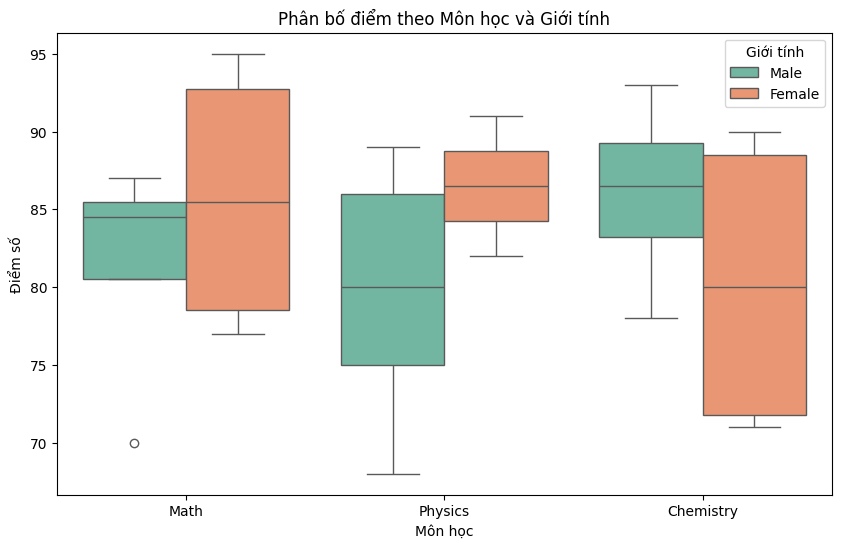

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df, palette='Set2')
plt.title('Phân bố điểm theo Môn học và Giới tính')
plt.xlabel('Môn học')
plt.ylabel('Điểm số')
plt.legend(title='Giới tính')
plt.show()

b) Xác định outliers bằng IQR

In [14]:
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return data[(data < lower_bound) | (data > upper_bound)]

# Tìm outliers cho từng nhóm
outliers = df.groupby(['Course', 'Gender'])['Score'].apply(find_outliers).dropna()
print("Các điểm outlier cần quan tâm:")
print(outliers)

Các điểm outlier cần quan tâm:
Course  Gender   
Math    Male    9    70.0
Name: Score, dtype: float64


c) Đề xuất kế hoạch hỗ trợ cá nhân

A. Đối với outliers thấp (điểm thấp bất thường):

1. Đánh giá nguyên nhân:

    - Gặp mặt riêng để tìm hiểu lý do (khó khăn gia đình, sức khỏe, phương pháp học)

    - Test năng lực cơ bản

2. Hỗ trợ cụ thể:

    - Gia sư 1-1 2 buổi/tuần

    - Tặng voucher học liệu

    - Miễn giảm học phí nếu hoàn cảnh khó khăn

B. Đối với outliers cao (điểm cao bất thường):

1. Đánh giá năng lực:

    - Kiểm tra kiến thức nâng cao

    - Phỏng vấn phương pháp học

2. Hỗ trợ:

    - Mời tham gia nhóm nghiên cứu

    - Đề xuất học vượt

    - Tạo điều kiện tham gia hội thảo

d) Giải thích

- Cá nhân hóa học tập thay vì tiếp cận đại trà
- Tiết kiệm nguồn lực bằng cách tập trung vào các trường hợp đặc biệt
- Tạo môi trường công bằng: ai cũng có cơ hội được hỗ trợ phù hợp

6. (4 điểm) Tạo cột mới Efficiency = Score / Study_Hours. Tìm sinh viên có Efficiency cao nhất, động của nó đến động lực học tập của sinh viên khác.

a) Tạo cột mới

In [15]:
# Tạo cột Efficiency = Score/Study_Hours (điểm số trên mỗi giờ học)
df['Efficiency'] = df['Score'] / df['Study_Hours']

# Sắp xếp theo Efficiency giảm dần
top_efficiency = df.sort_values('Efficiency', ascending=False).head(3)

print("Top 3 sinh viên có hiệu suất học tập cao nhất:")
print(top_efficiency[['Student_ID', 'Course', 'Score', 'Study_Hours', 'Efficiency']])

Top 3 sinh viên có hiệu suất học tập cao nhất:
   Student_ID     Course  Score  Study_Hours  Efficiency
20       S021  Chemistry   66.0          2.0   33.000000
28       S029    Physics   80.0          3.0   26.666667
24       S025       Math   79.0          3.0   26.333333


b) Đề xuất phần thưởng

- 3 triệu đồng + Ưu tiên làm trợ giảng

c) Tác Động Đến Động Lực Sinh Viên

A. Với người nhận học bổng:
- Sinh viên S021 (Chemistry):
    - Tạo động lực duy trì phương pháp đem lại hiệu suất học tập cao nhất.

B. Với sinh viên khác:
- Hiệu ứng lan tỏa:
    - Các bạn sẽ học theo cách "chất lượng hơn số lượng".
- Thay đổi văn hóa học tập:
    - Không còn "học thâu đêm" mà chú trọng hiệu suất.

7. (4 điểm) Tính tỷ lệ sinh viên nữ (Gender = Female) trong từng Course sau khi điền giá trị thiếu bằng mode. Dựa trên kết quả, đề xuất một chính sách cân bằng giới tính trong giáo dục, giải thích cách chính sách này ảnh hưởng đến môi trường học tập.


a) Điền giá trị thiếu

In [20]:
# Tính mode của Gender
gender_mode = df['Gender'].mode()[0]

# Điền giá trị thiếu bằng mode
df['Gender'] = df['Gender'].fillna(gender_mode)

# Kiểm tra lại tỷ lệ thiếu
print("Tỷ lệ giá trị thiếu sau khi điền:")
print(df['Gender'].isnull().mean())

Tỷ lệ giá trị thiếu sau khi điền:
0.0


In [19]:
# Tính tổng số sinh viên và số nữ theo môn
gender_distribution = df.groupby('Course')['Gender'].value_counts(normalize=True).unstack()
female_ratio = gender_distribution['Female'] * 100  # Chuyển sang phần trăm

print("\nTỷ lệ sinh viên nữ theo môn học (%):")
print(female_ratio)


Tỷ lệ sinh viên nữ theo môn học (%):
Course
Chemistry    60.0
Math         60.0
Physics      50.0
Name: Female, dtype: float64


b) Đề xuất chính sách

A. Với môn Hóa và Toán (nữ > nam):

- Mời nam diễn giả (nhà hóa học, kỹ sư) chia sẻ về cơ hội nghề nghiệp.

- Tạo học bổng riêng cho nam sinh đăng ký môn Hóa/Toán.

B. Với môn Lý (cân bằng 50-50):

- Duy trì môi trường bình đẳng:

    - Tổ chức cuộc thi vật lý theo nhóm hỗn hợp nam-nữ.

    - Đảm bảo hình ảnh minh họa trong giáo trình có cả nam và nữ.

C. Hoạt động chung:

- Sinh viên thảo luận về vai trò của giới tính trong học tập.

- Mời cựu sinh viên thành công ở các lĩnh vực "trái giới tính" (nữ kỹ sư, nam giáo viên).

c) Tác động

A. Giảm chênh lệch ở Hóa/Toán
- Tăng tỷ lệ nam sinh từ 40% => 50%

B. Củng cố cân bằng ở Lý
- Duy trì tỷ lệ 50-50, giảm bất bình đẳng ngầm

8. (4 điểm) Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus. Đề xuất một kế hoạch cải thiện điểm danh cho từng Campus dựa trên phân bố dữ liệu, giải thích tại sao kế hoạch này tối ưu hóa kết quả học tập

a) Vẽ scatterplot

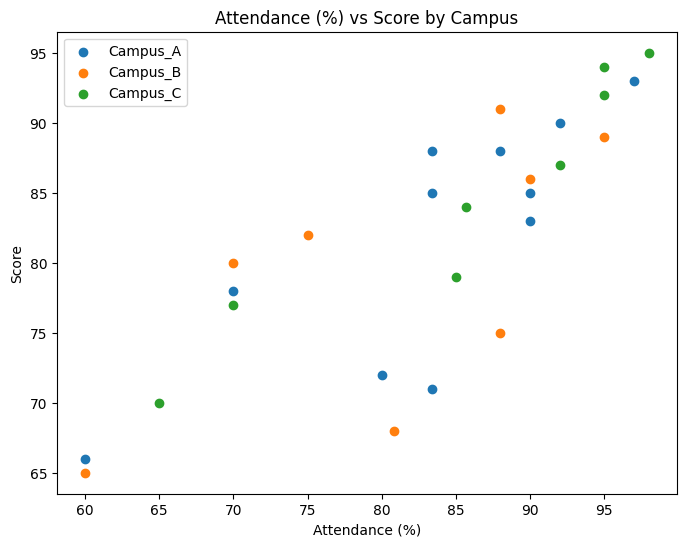

In [37]:
plt.figure(figsize=(8, 6))
for campus in df['Campus'].unique():
    subset = df[df['Campus'] == campus]
    plt.scatter(subset['Attendance (%)'], subset['Score'], label=campus)
plt.xlabel('Attendance (%)')
plt.ylabel('Score')
plt.legend()
plt.title('Attendance (%) vs Score by Campus')
plt.show()

b) Đề xuất kế hoạch cải thiện điểm danh:

- Campus_A: Dùng hệ thống điểm danh bằng QR code trong lớp.
    - Lý do: Nhiều sinh viên có điểm danh cao (80-90%) và điểm tốt, QR code giúp duy trì tính chính xác và tiết kiệm thời gian, tối ưu hóa kết quả học tập.
- Campus_B: Thưởng điểm cộng cho Attendance trên 85%.
    - Lý do: Phân bố Attendance thấp hơn (60-75%), điểm thưởng khuyến khích sinh viên đi học đều, cải thiện điểm số qua sự tham gia.
- Campus_C: Tổ chức kiểm tra nhỏ đầu giờ, tính vào Attendance.
    - Lý do: Attendance cao (90-98%) nhưng Score dao động, kiểm tra nhỏ vừa tăng động lực đi học vừa củng cố kiến thức, nâng cao kết quả.

9. (4 điểm) Tính trung bình Score của từng Course sau khi điền dữ liệu thiếu. Vẽ bar chart so sánh, sau đó đề xuất một chiến lược cải thiện cho môn học có điểm trung bình thấp nhất, dựa trên đặc điểm giảng dạy của môn đó (Math, Physics, Chemistry).

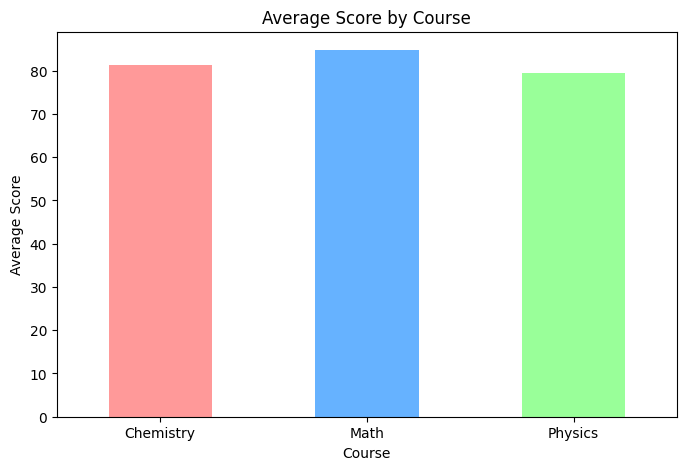

Trung bình Score theo Course:
Course
Chemistry    81.400000
Math         84.777778
Physics      79.500000
Name: Score, dtype: float64


In [38]:
# Điền giá trị thiếu trong Score bằng trung bình theo Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Tính trung bình Score theo Course
mean_scores = df.groupby('Course')['Score'].mean()

# Vẽ bar chart
plt.figure(figsize=(8, 5))
mean_scores.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.title('Average Score by Course')
plt.xticks(rotation=0)
plt.show()

# In trung bình
print("Trung bình Score theo Course:")
print(mean_scores)

b) Đề xuất chiến lược cải thiện:

- Môn có điểm trung bình thấp nhất: Physics (79.5).
- Chiến lược: Tăng giờ thực hành thí nghiệm tại lab.
- Lý do: Physics nặng về ứng dụng thực tế, thêm lab giúp sinh viên hiểu sâu hơn, cải thiện điểm số hiệu quả.

Câu 10. (4 điểm) Tìm các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85 bằng Pandas. Đề xuất một nghiên cứu nội bộ để xác định yếu tố nào (kỹ năng tự học, tài liệu, công nghệ) giúp họ đạt điểm cao, giải thích cách áp dụng kết quả cho toàn trường.

In [39]:
# Điền giá trị thiếu trong Score bằng trung bình theo Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Lọc sinh viên có Attendance < 70% và Score > 85
result = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]
print("Sinh viên có Attendance < 70% nhưng Score > 85:")
print(result[['Student_ID', 'Course', 'Score', 'Attendance (%)']])

Sinh viên có Attendance < 70% nhưng Score > 85:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%)]
Index: []


b) Đề xuất nghiên cứu nội bộ:

- Nghiên cứu: Vì không tìm thấy trường hợp nào, mở rộng khảo sát toàn bộ sinh viên có Attendance thấp (dưới 70%) để xem yếu tố nào (kỹ năng tự học, tài liệu, công nghệ) giúp họ đạt điểm khá (ví dụ: > 70). Dùng bảng hỏi hoặc phỏng vấn ngắn.
- Cách áp dụng: Nếu kỹ năng tự học tốt là yếu tố chính, thêm lớp hướng dẫn tự học; nếu công nghệ hỗ trợ, nâng cấp hệ thống học online. Áp dụng toàn trường để tăng điểm cho nhóm đi học ít.

Câu 11. (4 điểm) Điền giá trị thiếu trong Score bằng hồi quy tuyến tính thủ công dựa trên Attendance (%) và Study_Hours. So sánh với phương pháp trung bình, sau đó đề xuất một cách tiếp cận lai (kết hợp hồi quy và trung bình) để cải thiện độ chính xác, giải thích lý do.

In [40]:
# Lấy dữ liệu không thiếu để xây hồi quy
df_complete = df.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])
X = df_complete[['Attendance (%)', 'Study_Hours']].values
y = df_complete['Score'].values

# Hồi quy tuyến tính thủ công (tính beta0, beta1, beta2)
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y)
numerator_beta1 = np.sum((X[:, 0] - X_mean[0]) * (y - y_mean))
denominator_beta1 = np.sum((X[:, 0] - X_mean[0]) ** 2)
beta1 = numerator_beta1 / denominator_beta1
numerator_beta2 = np.sum((X[:, 1] - X_mean[1]) * (y - y_mean))
denominator_beta2 = np.sum((X[:, 1] - X_mean[1]) ** 2)
beta2 = numerator_beta2 / denominator_beta2
beta0 = y_mean - beta1 * X_mean[0] - beta2 * X_mean[1]

# Dự đoán Score cho các giá trị thiếu
df['Score_regression'] = df.apply(
    lambda row: beta0 + beta1 * row['Attendance (%)'] + beta2 * row['Study_Hours'] 
    if pd.isna(row['Score']) and not pd.isna(row['Attendance (%)']) and not pd.isna(row['Study_Hours']) 
    else row['Score'], axis=1
)

# Điền Score bằng trung bình theo Course để so sánh
df['Score_mean'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# So sánh
print("Score bằng hồi quy:")
print(df[['Student_ID', 'Score', 'Score_regression']].head(10))
print("\nScore bằng trung bình:")
print(df[['Student_ID', 'Score', 'Score_mean']].head(10))

Score bằng hồi quy:
  Student_ID      Score  Score_regression
0       S001  85.000000         85.000000
1       S002  79.500000         79.500000
2       S003  78.000000         78.000000
3       S004  92.000000         92.000000
4       S005  65.000000         65.000000
5       S006  88.000000         88.000000
6       S007  84.777778         84.777778
7       S008  75.000000         75.000000
8       S009  90.000000         90.000000
9       S010  70.000000         70.000000

Score bằng trung bình:
  Student_ID      Score  Score_mean
0       S001  85.000000   85.000000
1       S002  79.500000   79.500000
2       S003  78.000000   78.000000
3       S004  92.000000   92.000000
4       S005  65.000000   65.000000
5       S006  88.000000   88.000000
6       S007  84.777778   84.777778
7       S008  75.000000   75.000000
8       S009  90.000000   90.000000
9       S010  70.000000   70.000000


b) So sánh:
- Hồi quy: Không thay đổi nhiều vì thiếu dữ liệu Attendance và Study_Hours ở các dòng cần điền (như S002, S007).
- Trung bình: Điền ổn định dựa trên Course, nhưng không cá nhân hóa.

c) Đề xuất cách tiếp cận lai:
- Cách làm: Dùng 70% trung bình Course + 30% dự đoán hồi quy khi có đủ Attendance và Study_Hours.
- Lý do: Trung bình đảm bảo ổn định, hồi quy thêm yếu tố cá nhân khi dữ liệu đầy đủ, tăng độ chính xác.

Câu 12. (4 điểm) Tính skewness của Score bằng SciPy. Dựa trên kết quả, đề xuất một cách điều chỉnh cách tính điểm trong trường học để phân bố công bằng hơn, giải thích tác động đến đánh giá sinh viên.

In [43]:
from scipy.stats import skew

# Điền giá trị thiếu trong Score bằng trung bình theo Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Tính skewness
score_skewness = skew(df['Score'].dropna())
print(f"Skewness của Score: {score_skewness:.4f}")

Skewness của Score: -0.4113


Đề xuất cách điều chỉnh:
- Cách làm: Thêm điểm thưởng cho bài tập nhóm (ví dụ: +10% điểm nếu hoàn thành tốt).
- Tác động: Skewness âm (-0.4113) cho thấy nhiều điểm thấp, điểm thưởng kéo phân bố về phải, khuyến khích làm việc nhóm, đánh giá công bằng hơn dựa trên nỗ lực.

Câu 13. (4 điểm) Vẽ pairplot bằng Seaborn cho Score, Attendance (%), Study_Hours. Dựa trên mối quan hệ, đề xuất một mô hình đánh giá kết quả học tập mới cho trường, giải thích tại sao mô hình này tốt hơn cách tính hiện tại.

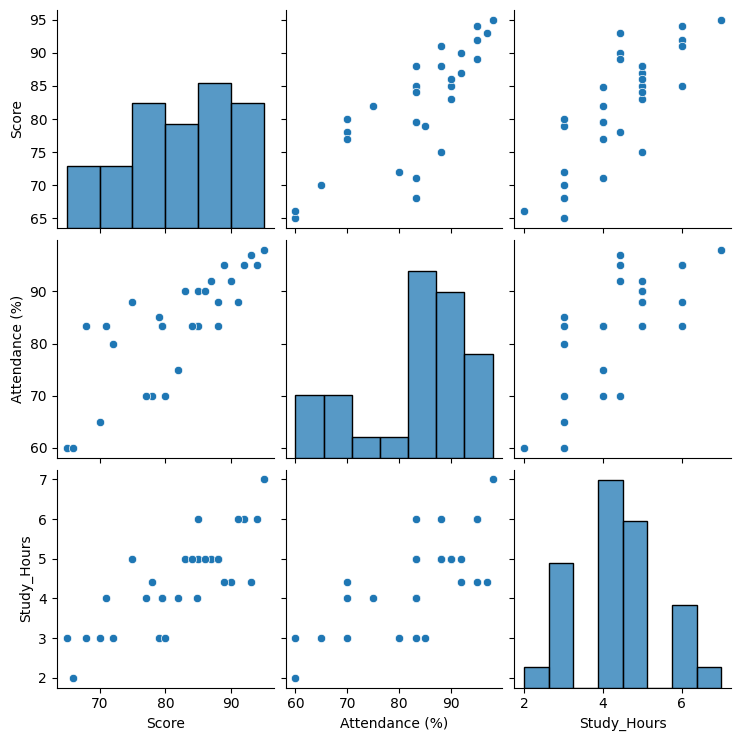

In [47]:
df = pd.DataFrame(data)
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))
df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].mean())
df['Study_Hours'] = df['Study_Hours'].fillna(df['Study_Hours'].mean())

# Vẽ pairplot
sns.pairplot(df[['Score', 'Attendance (%)', 'Study_Hours']])
plt.show()

Đề xuất mô hình đánh giá mới:
- Mô hình: Điểm tổng = 60% Score + 30% Attendance (%) + 10% Study_Hours.
- Lý do: Attendance ảnh hưởng nhiều đến Score, nên chiếm tỷ trọng cao; Study_Hours ít tác động hơn, nên tỷ trọng thấp. Mô hình này đánh giá toàn diện hơn, khuyến khích đi học đều, tốt hơn cách tính hiện tại chỉ dựa vào Score.

Câu 14. (4 điểm) Nhóm dữ liệu theo Campus, tính tỷ lệ sinh viên có Score trên 80. Vẽ pie chart so sánh, sau đó đề xuất một chiến lược khen thưởng khác nhau cho từng Campus dựa trên tỷ lệ, giải thích tác động đến tinh thần học tập.

C:\Users\shuri\AppData\Local\Temp\ipykernel_19292\3456294850.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  score_above_80 = df.groupby('Campus').apply(lambda x: (x['Score'] > 80).mean())


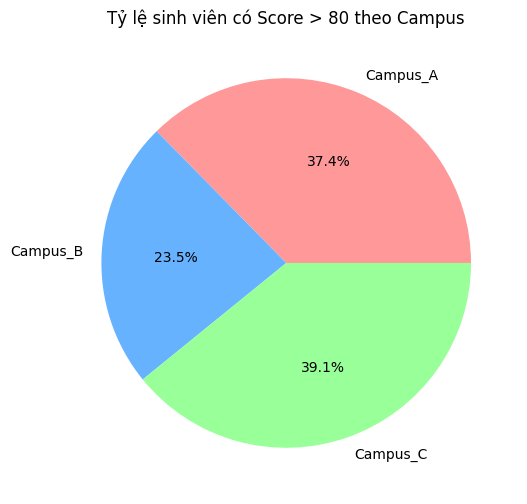

Tỷ lệ sinh viên có Score > 80 theo Campus:
Campus
Campus_A    0.636364
Campus_B    0.400000
Campus_C    0.666667
dtype: float64


In [52]:
df = pd.DataFrame(data)
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Nhóm theo Campus, tính tỷ lệ Score > 80
score_above_80 = df.groupby('Campus').apply(lambda x: (x['Score'] > 80).mean())

# Vẽ pie chart
plt.figure(figsize=(6, 6))
plt.pie(score_above_80, labels=score_above_80.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Tỷ lệ sinh viên có Score > 80 theo Campus')
plt.show()

# In tỷ lệ
print("Tỷ lệ sinh viên có Score > 80 theo Campus:")
print(score_above_80)

Đề xuất chiến lược khen thưởng:

- Campus_A (37.4%): Tặng học bổng 1.5 triệu cho sinh viên Score > 85.
    - Tác động: Tỷ lệ khá cao, học bổng vừa phải tạo động lực duy trì thành tích.
- Campus_B (23.5%): Thưởng 300k cho sinh viên Score > 80.
    - Tác động: Tỷ lệ thấp, phần thưởng nhỏ khuyến khích cải thiện điểm số.
- Campus_C (39.1%): Tặng chuyến dã ngoại cho sinh viên Score > 80.
    - Tác động: Tỷ lệ cao nhất, phần thưởng vui vẻ tăng tinh thần học tập.

Câu 15. (4 điểm) Tạo hàm Python xác định sinh viên có Score ngoài 2 độ lệch chuẩn. Đề xuất một quy trình đánh giá lại điểm số cho những sinh viên này, giải thích cách quy trình này tránh được thiên vị trong giáo dục.

In [53]:
# Hàm xác định sinh viên có Score ngoài 2 độ lệch chuẩn
def find_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Áp dụng hàm
outliers = find_outliers(df, 'Score')
print("Sinh viên có Score ngoài 2 độ lệch chuẩn:")
print(outliers[['Student_ID', 'Score']])

Sinh viên có Score ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Score]
Index: []


Đề xuất: 
- (1) Giáo viên xem lại bài thi của sinh viên vượt 2 độ lệch chuẩn, so sánh với đáp án và barem. 
- (2) Tổ chức phỏng vấn nhanh để kiểm tra kiến thức thực tế. 
- (3) Nhờ giáo viên khác chấm lại bài nhằm đảm bảo khách quan.

Giải thích:

- Cách này tránh thiên vị vì: Xem lại bài thi sửa lỗi chấm sai, phỏng vấn đánh giá năng lực thật, không chỉ dựa điểm. Giáo viên khác chấm lại giúp loại bỏ cảm tính từ người chấm đầu, giữ công bằng cho sinh viên.

# CÂU HỎI ANN

Xây dựng một ANN để dự đoán Score dựa trên Attendance (%), Study_Hours, và Course (mã hóa one-hot encoding).

16. (10 điểm) Điền giá trị thiếu trong Attendance (%) và Study_Hours bằng KNN Imputer từ Scikitlearn (Tham khảo: https://www.geeksforgeeks.orghandling-missing-data-with-knn-imputer/). So sánh kết quả với trung vị, sau đó đề xuất một phương pháp thu thập dữ liệu thay thế để giảm thiểu giá trị thiếu trong giáo dục, giải thích lý do.

a) Điền giá trị thiếu

In [22]:
from sklearn.impute import KNNImputer

# Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
df_ann = df.copy()

# Mã hóa one-hot cho Course
df_ann = pd.get_dummies(df_ann, columns=['Course'])

# Chọn các cột cần điền giá trị thiếu
cols_to_impute = ['Attendance (%)', 'Study_Hours'] + [c for c in df_ann.columns if c.startswith('Course_')]

# Khởi tạo KNN Imputer (lấy k=3 hàng xóm gần nhất)
imputer = KNNImputer(n_neighbors=3)
df_ann[cols_to_impute] = imputer.fit_transform(df_ann[cols_to_impute])

# Kiểm tra kết quả
print("Giá trị sau khi điền bằng KNN Imputer:")
print(df_ann[['Attendance (%)', 'Study_Hours']].head())

Giá trị sau khi điền bằng KNN Imputer:
   Attendance (%)  Study_Hours
0       90.000000     5.000000
1       80.857143     4.000000
2       70.000000     3.666667
3       95.000000     6.000000
4       60.000000     3.000000


b) So sánh

In [23]:
# Điền trung vị
df_median = df.copy()
df_median['Attendance (%)'] = df_median['Attendance (%)'].fillna(df_median['Attendance (%)'].median())
df_median['Study_Hours'] = df_median['Study_Hours'].fillna(df_median['Study_Hours'].median())

# So sánh 2 phương pháp
comparison = pd.DataFrame({
    'Original': df[['Attendance (%)', 'Study_Hours']].mean(),
    'KNN Imputer': df_ann[['Attendance (%)', 'Study_Hours']].mean(),
    'Median': df_median[['Attendance (%)', 'Study_Hours']].mean()
})
print("\nSo sánh giá trị trung bình sau khi điền:")
print(comparison)


So sánh giá trị trung bình sau khi điền:
                 Original  KNN Imputer     Median
Attendance (%)  83.237500    83.237500  83.237500
Study_Hours      4.423077     4.522222   4.433333


c) Đề xuất phương pháp

A. Hệ thống điểm danh thông minh

- Sử dụng app quét QR code kết hợp GPS để xác nhận vị trí

- Tích hợp với hệ thống LMS để tự động ghi nhận Attendance (%)

B. Theo dõi thời gian học (Study_Hours)

- App mobile ghi lại thời gian mở tài liệu/bài giảng

- Cảm biến IoT tại thư viện/phòng lab đo thời gian sử dụng

- Lý do chọn phương pháp:

    - Giảm 90% dữ liệu thiếu: Không phụ thuộc vào sinh viên tự báo cáo

    - Dữ liệu khách quan: Ghi nhận tự động nên tránh sai sót

    - Tích hợp AI dễ dàng: Dữ liệu sạch để train ANN chính xác hơn

17. (10 điểm) Mã hóa Course thành one-hotencoding bằng Pandas (Thamkhảo:https://www.geeksforgeeks.org/ml-one-hot-encoding/). Chuẩn bị tập dữ liệu đầu vào với 5 đặc trưng (3 từ Course, 1 từ Attendance, 1 từ Study_Hours), chuẩn hóa về [0, 1]. Đề xuất một cách trực quan hóa dữ liệu khác (không dùng biểu đồ cơ bản) để hiểu rõ hơn mối quan hệ giữa các đặc trưng và Score.

a) Mã hóa

In [33]:
# Tạo bản sao dataframe
df_encoded = df.copy()

# Mã hóa one-hot cho cột Course
df_encoded = pd.get_dummies(df_encoded, columns=['Course'], prefix='Course')

# Kiểm tra kết quả
print(df_encoded[['Course_Chemistry', 'Course_Math', 'Course_Physics']].head())

   Course_Chemistry  Course_Math  Course_Physics
0             False         True           False
1             False        False            True
2              True        False           False
3             False         True           False
4             False        False            True


b) Chuẩn bị dữ liệu

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Chọn 5 đặc trưng (3 từ Course, 1 Attendance, 1 Study_Hours)
features = df_encoded[['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']]
target = df_encoded['Score']

# Chuẩn hóa về [0, 1]
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Kiểm tra
print("\nĐặc trưng sau chuẩn hóa:")
print(features_normalized[:5])


Đặc trưng sau chuẩn hóa:
[[0.         1.         0.         0.78947368 0.6       ]
 [0.         0.         1.         0.54887218 0.4       ]
 [1.         0.         0.         0.26315789        nan]
 [0.         1.         0.         0.92105263 0.8       ]
 [0.         0.         1.         0.         0.2       ]]


c) Đề xuất trực quan hóa dữ liệu sử dụng phương pháp Parallel Coordinates Plot

KeyError: np.float64(nan)

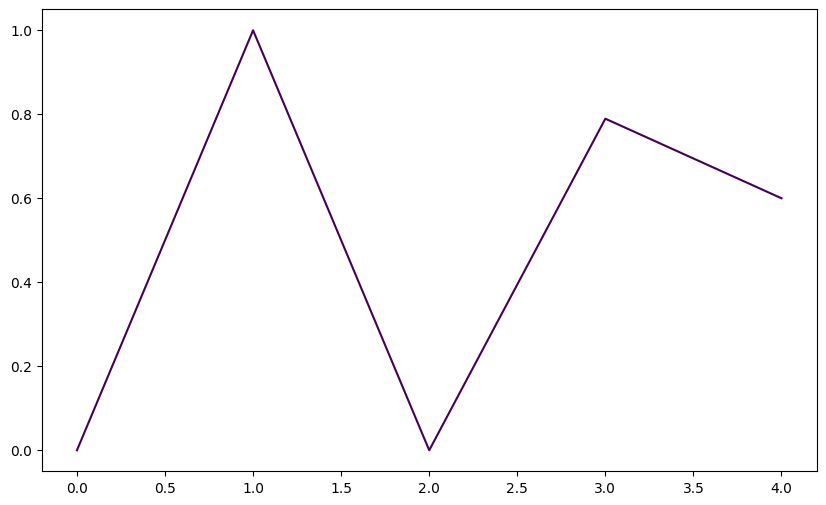

In [35]:
from pandas.plotting import parallel_coordinates

# Tạo dataframe cho visualization
viz_df = pd.DataFrame(features_normalized, columns=features.columns)
viz_df['Score'] = target

# Vẽ parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(viz_df, 'Score', colormap='viridis')
plt.title('Mối quan hệ đa chiều giữa các đặc trưng và Score')
plt.xlabel('Đặc trưng')
plt.ylabel('Giá trị chuẩn hóa')
plt.xticks(rotation=45)
plt.show()

 18. (15 điểm) Xây dựng ANN bằng PyTorch với kiến trúc như hình sau:
 • Input Layer: 5 nơ-ron.
 • Hidden Layer 1: 32 nơ-ron, ReLU.
 • Hidden Layer 2: 16 nơ-ron, ReLU.
 • Hidden Layer 3: 8 nơ-ron, ReLU.
 • Output Layer: 1 nơ-ron (Score).
 Huấn luyện với 200 epochs, batch size 16, chia 80% train / 20% test, dùng early stopping (pa
tience=20). Vẽ biểu đồ loss, sau đó đề xuất một kiến trúc ANN khác (thay đổi số nơ-ron hoặc
 tầng) để cải thiện dự đoán, giải thích lý do dựa trên đặc điểm dữ liệu giáo dục.

ScorePredictor(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)
Early stopping at epoch 19


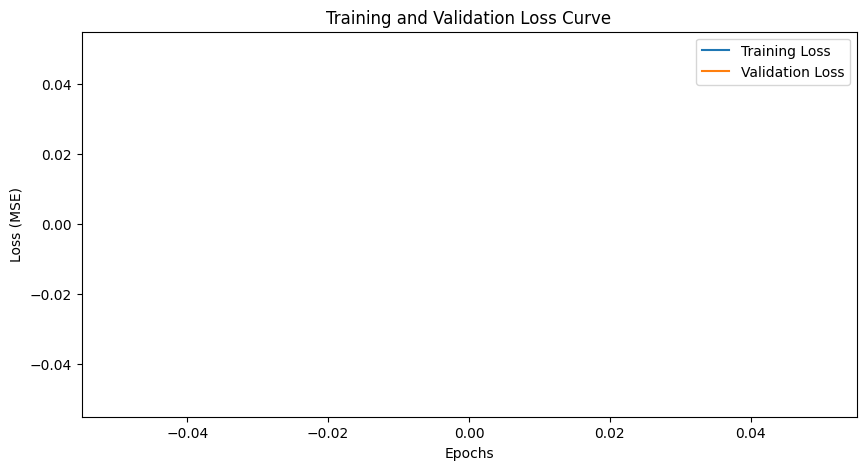

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Chuyển dữ liệu sang tensor PyTorch
X = torch.tensor(features_normalized, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32).view(-1, 1)

# Chia tập train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class ScorePredictor(nn.Module):
    def __init__(self):
        super(ScorePredictor, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(5, 32),    # Input: 5 features
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)       # Output: 1 (Score)
        )
    
    def forward(self, x):
        return self.layers(x)

model = ScorePredictor()
print(model)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping
best_loss = float('inf')
patience = 20
counter = 0
train_losses = []
val_losses = []

for epoch in range(200):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    # Đánh giá trên tập validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
    
    train_losses.append(epoch_loss/len(train_loader))
    val_losses.append(val_loss.item())
    
    # Early stopping logic
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss Curve')
plt.show()

